<a href="https://colab.research.google.com/github/goodcoder5/LGMVIP-DataScience/blob/main/neural_network_for_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt



In [ ]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [ ]:
train = mnist_train_images.reshape(60000, 784)
test = mnist_test_images.reshape(10000, 784)

In [ ]:
train = train.astype('float32')
test = test.astype('float32')
train /= 255
test /= 255

In [ ]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


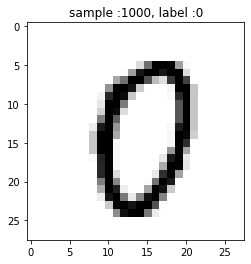

In [ ]:
def display(num):
  print(train_labels[num])
  label = train_labels[num].argmax(axis = 0)
  image = train[num].reshape([28, 28])
  plt.title('sample :%d, label :%d' % (num, label))
  plt.imshow(image, cmap = plt.get_cmap('gray_r'))
  plt.show()

display(1000)

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (784, )))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer=RMSprop(), metrics = ['accuracy'])


In [ ]:
history = model.fit(train,train_labels,batch_size = 100,epochs = 10, verbose = 2,validation_data = (test,test_labels))

Epoch 1/10
600/600 - 10s - loss: 0.2372 - accuracy: 0.9265 - val_loss: 0.0943 - val_accuracy: 0.9704 - 10s/epoch - 16ms/step
Epoch 2/10
600/600 - 9s - loss: 0.1041 - accuracy: 0.9698 - val_loss: 0.0846 - val_accuracy: 0.9735 - 9s/epoch - 15ms/step
Epoch 3/10
600/600 - 9s - loss: 0.0780 - accuracy: 0.9775 - val_loss: 0.0773 - val_accuracy: 0.9782 - 9s/epoch - 15ms/step
Epoch 4/10
600/600 - 9s - loss: 0.0633 - accuracy: 0.9818 - val_loss: 0.0748 - val_accuracy: 0.9798 - 9s/epoch - 15ms/step
Epoch 5/10
600/600 - 9s - loss: 0.0554 - accuracy: 0.9843 - val_loss: 0.0864 - val_accuracy: 0.9790 - 9s/epoch - 15ms/step
Epoch 6/10
600/600 - 9s - loss: 0.0459 - accuracy: 0.9867 - val_loss: 0.0934 - val_accuracy: 0.9783 - 9s/epoch - 14ms/step
Epoch 7/10
600/600 - 9s - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.0802 - val_accuracy: 0.9811 - 9s/epoch - 14ms/step
Epoch 8/10
600/600 - 9s - loss: 0.0398 - accuracy: 0.9891 - val_loss: 0.0975 - val_accuracy: 0.9828 - 9s/epoch - 15ms/step
Epoch 9/10
600

In [ ]:
score = model.evaluate(test,test_labels,verbose = 0)
print("Test loss",score[0])
print("Test accuracy",score[1])

Test loss 0.11133835464715958
Test accuracy 0.9805999994277954


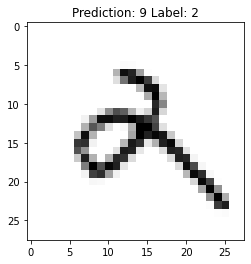

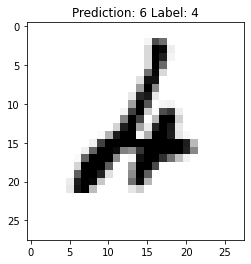

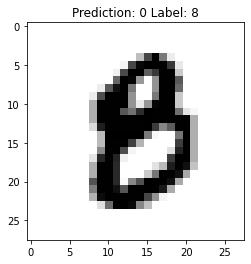

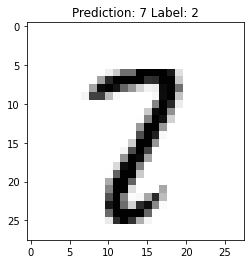

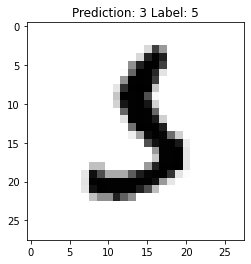

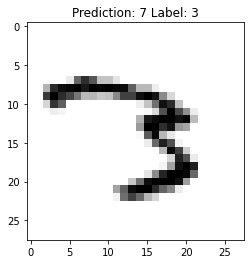

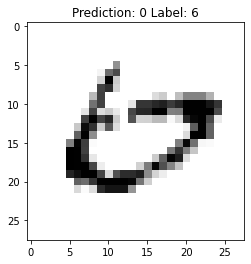

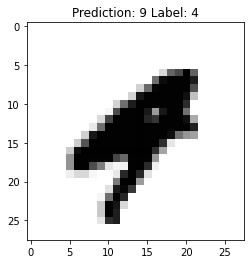

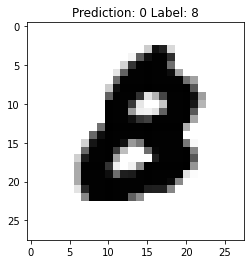

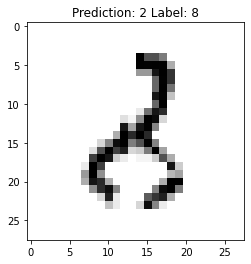

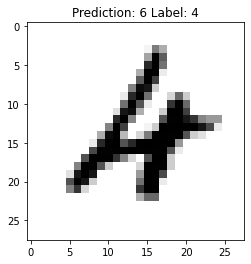

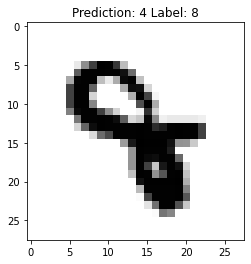

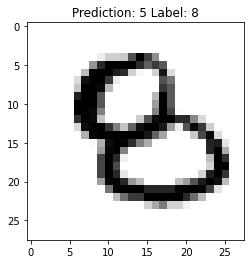

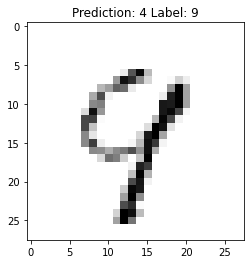

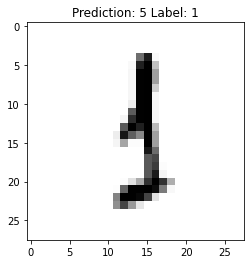

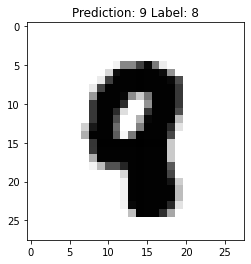

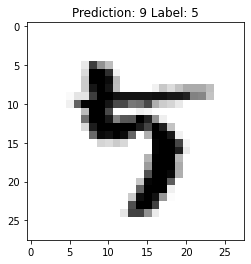

In [ ]:
for x in range(1000):
    test_image = test[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()